# Quantum Phase Estimation

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator $U$, the algorithm estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. Since $U$ is unitary, all of its eigenvalues have a norm of 1.

## 1. Overview <a id='overview'></a>

The general quantum circuit for phase estimation is shown below. The top register contains $t$ 'counting' qubits, and the bottom contains qubits in the state $|\psi\rangle$:
![image1](images/qpe_tex_qz.png)


### 1.1 Intuition <a id='intuition'></a>
The quantum phase estimation algorithm uses phase kickback to write the phase of $U$ (in the Fourier basis) to the $t$ qubits in the counting register. We then use the inverse QFT to translate this from the Fourier basis into the computational basis, which we can measure.

We remember (from the QFT chapter) that in the Fourier basis the topmost qubit completes one full rotation when counting between $0$ and $2^t$. To count to a number, $x$ between $0$ and $2^t$, we rotate this qubit by $\tfrac{x}{2^t}$ around the z-axis. For the next qubit we rotate by $\tfrac{2x}{2^t}$, then $\tfrac{4x}{2^t}$ for the third qubit.

![image2](images/qpe_intuition.jpg)

When we use a qubit to control the $U$-gate, the qubit will turn (due to kickback) proportionally to the phase $e^{2i\pi\theta}$. We can use successive $CU$-gates to repeat this rotation an appropriate number of times until we have encoded the phase theta as a number between $0$ and $2^t$ in the Fourier basis. 

Then we simply use $QFT^\dagger$ to convert this into the computational basis.



### 1.2 Mathematical Foundation <a id='maths'></a>

As mentioned above, this circuit estimates the phase of a unitary operator $U$. It estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, where $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. The circuit operates in the following steps:

i. **Setup**: $\vert\psi\rangle$ is in one set of qubit registers. An additional set of $n$ qubits form the counting register on which we will store the value $2^n\theta$: 



$$ |\psi_0\rangle = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

 

ii. **Superposition**: Apply a $n$-bit Hadamard gate operation $H^{\otimes n}$ on the counting register: 



$$ |\psi_1\rangle = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$



iii. **Controlled Unitary Operations**: We need to introduce the controlled unitary $CU$ that applies the unitary operator $U$ on the target register only if its corresponding control bit is $|1\rangle$. Since $U$ is a unitary operator with eigenvector $|\psi\rangle$ such that $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, this means: 



$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$



Applying all the $n$ controlled operations $CU^{2^j}$ with $0\leq j\leq n-1$, and using the relation $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$:

$$
\begin{aligned}
|\psi_{2}\rangle & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}
$$

where $k$ denotes the integer representation of n-bit binary numbers. 

iv. **Inverse Fourier Transform**: Notice that the above expression is exactly the result of applying a quantum Fourier transform as we derived in the notebook on [Quantum Fourier Transform and its Qiskit Implementation](/course/ch-algorithms/quantum-fourier-transform). Recall that QFT maps an n-qubit input state $\vert x\rangle$ into an output as

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

Replacing $x$ by $2^n\theta$ in the above expression gives exactly the expression derived in step 2 above. Therefore, to recover the state $\vert2^n\theta\rangle$, apply an inverse Fourier transform on the auxiliary register. Doing so, we find

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$ 

v. **Measurement**: 
The above expression peaks near $x = 2^n\theta$. For the case when $2^n\theta$ is an integer, measuring in the computational basis gives the phase in the auxiliary register with high probability: 



$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$



For the case when $2^n\theta$ is not an integer, it can be shown that the above expression still peaks near $x = 2^n\theta$ with probability better than $4/\pi^2 \approx 40\%$ [1].

## 2. Example: T-gate <a id='example_t_gate'></a>

Let’s take a gate we know well, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. You will remember that the $T$-gate adds a phase of $e^\frac{i\pi}{4}$ to the state $|1\rangle$:

$$ T|1\rangle = 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\begin{bmatrix}
0\\
1\\ 
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$

Since QPE will give us $\theta$ where:



$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$



We expect to find:



$$\theta = \frac{1}{8}$$



In this example we will use three qubits and obtain an _exact_ result (not an estimation!)

### 2.1 Creating the Circuit <a id='creating_the_circuit'></a>
Let's first prepare our environment:

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit import transpile

Now, set up the quantum circuit. We will use four qubits -- qubits 0 to 2 as counting qubits, and qubit 3 as the eigenstate of the unitary operator ($T$). 

We initialize $\vert\psi\rangle = \vert1\rangle$ by applying an $X$ gate:

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

Next, we apply Hadamard gates to the counting qubits:

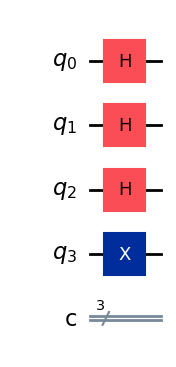

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(output= 'mpl')

Next we perform the controlled unitary operations.

We'll use Qiskit's [`PhaseGate`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html) to create the $T$ operation. The phase gate does the transformation $P|1\rangle = e^{i\lambda}|1\rangle$, where $\lambda$ is the angle we provide. Since we want to implement $T$, which performs $T|1\rangle = e^{2\pi i \theta}|1\rangle$, we need to set $\lambda = \tfrac{2 \pi}{8} = \pi/4$.

Also remember that Qiskit orders its qubits the opposite way round to the circuit diagram in the overview.

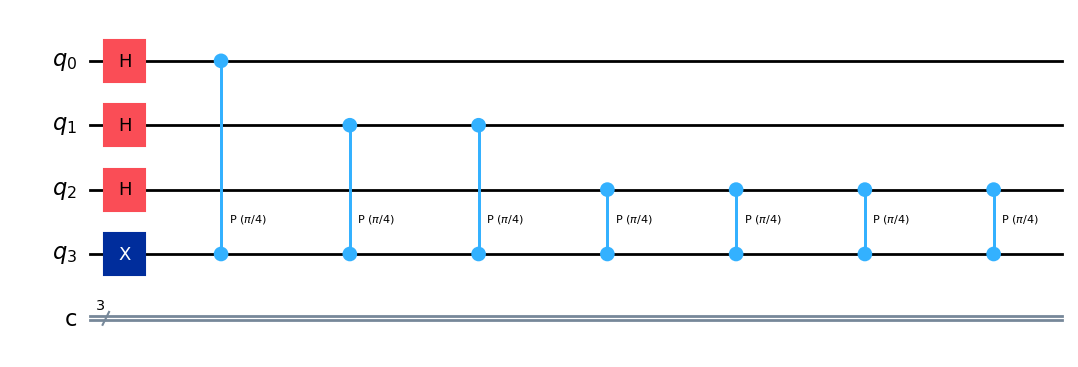

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2
qpe.draw(output= 'mpl')

We apply the inverse quantum Fourier transformation to convert the state of the counting register, then measure the counting register:

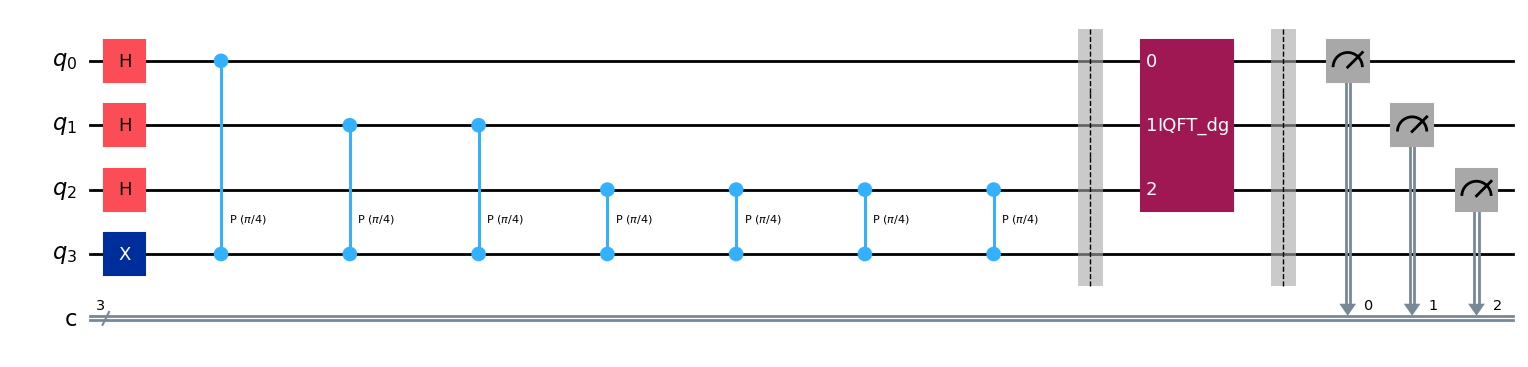

In [5]:
qpe.barrier()
# Apply inverse QFT
qpe = qpe.compose(QFT(3, inverse=True), [0,1,2])
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw(output= 'mpl')

### 2.2 Results <a id='results'></a>

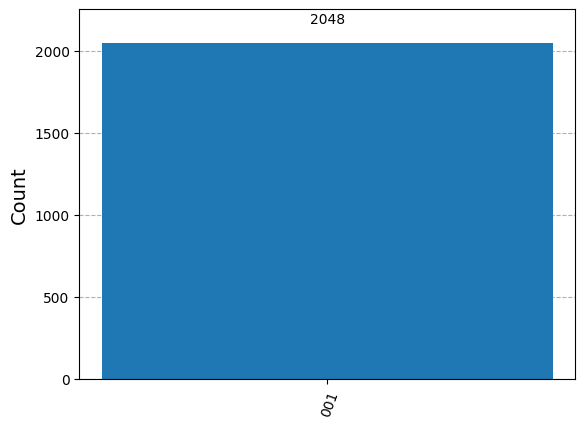

In [6]:
# Create an AerSimulator instance
simulator = AerSimulator()

# Define the number of shots for the simulation
shots = 2048

# Transpile the quantum phase estimation circuit
t_qpe = transpile(qpe, simulator)

# Run the simulation and get the result
results = simulator.run(t_qpe, shots=shots).result()

# Get the measurement results
answer = results.get_counts()

plot_histogram(answer)

We see we get one result (`001`) with certainty, which translates to the decimal: `1`. We now need to divide our result (`1`) by $2^n$ to get $\theta$:



$$ \theta = \frac{1}{2^3} = \frac{1}{8} $$



This is exactly the result we expected!

### 3.Phase Estimation and Results <a id='results'></a>

In [39]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile, assemble
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

def qft_dagger(num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits // 2):
        qc.swap(i, num_qubits - i - 1)
    for i in range(num_qubits):
        for j in range(i):
            qc.cp(-np.pi / (2 ** (i - j)), j, i)
        qc.h(i)
    return qc


In [40]:
# Function to create the QPE circuit
def phase_estimation(unitary, eigenstate, num_ancillae):
    num_unitary_qubits = unitary.num_qubits
    ancilla_reg = QuantumRegister(num_ancillae, name="ancilla")
    unitary_reg = QuantumRegister(num_unitary_qubits, name="unitary")
    classical_reg = ClassicalRegister(num_ancillae, name="classical")
    qc = QuantumCircuit(ancilla_reg, unitary_reg, classical_reg)

    # Initialize ancilla qubits in superposition
    qc.h(ancilla_reg)

    # Add eigenstate to the circuit
    qc.compose(eigenstate, qubits=unitary_reg, inplace=True)

    # Controlled unitary operations
    for i in range(num_ancillae):
        controlled_unitary = unitary.control(1)
        qc.compose(controlled_unitary, qubits=[ancilla_reg[i]] + list(unitary_reg), inplace=True, front=True)

    # Add inverse QFT to ancilla qubits
    qft_inverse = qft_dagger(num_ancillae)
    qc.append(qft_inverse, ancilla_reg)

    # Measure the ancilla qubits
    qc.measure(ancilla_reg, classical_reg)

    return qc

Quantum Phase Estimation Circuit:


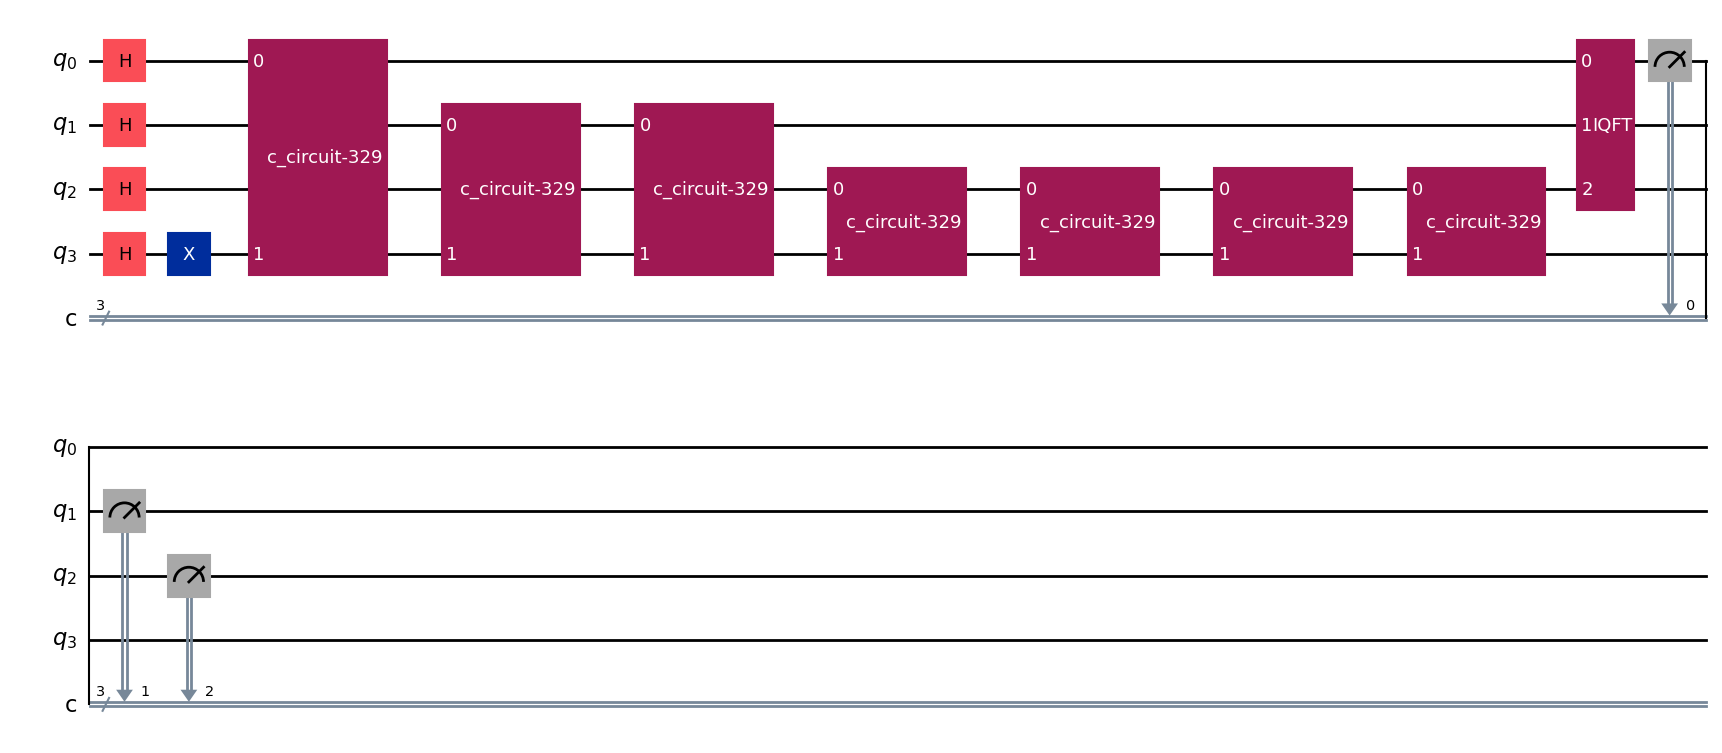

In [41]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

def phase_estimation(unitary, eigenstate, num_ancillae):
    # Create a new quantum circuit
    qpe = QuantumCircuit(num_ancillae + 1, num_ancillae)  # Include ancillae and 1 target qubit
    
    # Add eigenstate preparation
    qpe.compose(eigenstate, qubits=[num_ancillae], inplace=True)
    
    # Apply Hadamard gates to ancilla qubits
    for i in range(num_ancillae):
        qpe.h(i)
    
    # Controlled Unitary operations
    for i in range(num_ancillae):
        repetitions = 2 ** i
        controlled_unitary = unitary.control()
        for _ in range(repetitions):
            qpe.append(controlled_unitary, [i, num_ancillae])
    
    # Apply inverse QFT
    qpe.append(QFT(num_ancillae, do_swaps=False).inverse(), range(num_ancillae))
    
    # Measurement
    qpe.measure(range(num_ancillae), range(num_ancillae))
    
    return qpe

# Generate the QPE circuit
qpe_circuit = phase_estimation(unitary, eigenstate, num_ancillae)

# Visualize the circuit
print("Quantum Phase Estimation Circuit:")
qpe_circuit.draw("mpl")



In [42]:
# Simulate the circuit
simulator = AerSimulator()

# Transpile the circuit to the backend
transpiled_circuit = transpile(qpe_circuit, simulator)

# Assemble the transpiled circuit into a Qobj
qobj = assemble(transpiled_circuit, shots=1024)

# Run the simulation and retrieve the result
job = simulator.run(transpiled_circuit, shots=1024) # Pass shots here
result = job.result()# Retrieve the result

# Retrieve and display results
counts = result.get_counts()
print("\nMeasurement Results (Phase Estimation):")
print(counts)



Measurement Results (Phase Estimation):
{'001': 201, '111': 212, '110': 249, '010': 290, '011': 35, '101': 37}


C:\Users\noelm\AppData\Local\Temp\ipykernel_15156\2468114788.py:8: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(transpiled_circuit, shots=1024)


In [43]:

# Plot the histogram of results
plot_histogram(counts)
plt.show()

# Analyze eigenvalues
# For the Z gate, the eigenvalues are ±1 (corresponding to θ = 0 or 0.5 in the binary output).



In [44]:
print("\nEigenvalue Analysis:")
for outcome, freq in counts.items():
    phase = int(outcome[::-1], 2) / (2 ** num_ancillae)  # Convert binary to phase
    eigenvalue = np.exp(2j * np.pi * phase)  # Eigenvalue from the phase
    print(f"Outcome: {outcome}, Phase: {phase:.2f}, Eigenvalue: {eigenvalue}")


Eigenvalue Analysis:
Outcome: 001, Phase: 0.50, Eigenvalue: (-1+1.2246467991473532e-16j)
Outcome: 111, Phase: 0.88, Eigenvalue: (0.7071067811865474-0.7071067811865477j)
Outcome: 110, Phase: 0.38, Eigenvalue: (-0.7071067811865475+0.7071067811865476j)
Outcome: 010, Phase: 0.25, Eigenvalue: (6.123233995736766e-17+1j)
Outcome: 011, Phase: 0.75, Eigenvalue: (-1.8369701987210297e-16-1j)
Outcome: 101, Phase: 0.62, Eigenvalue: (-0.7071067811865477-0.7071067811865475j)


Histogram saved as 'histogram.png'.


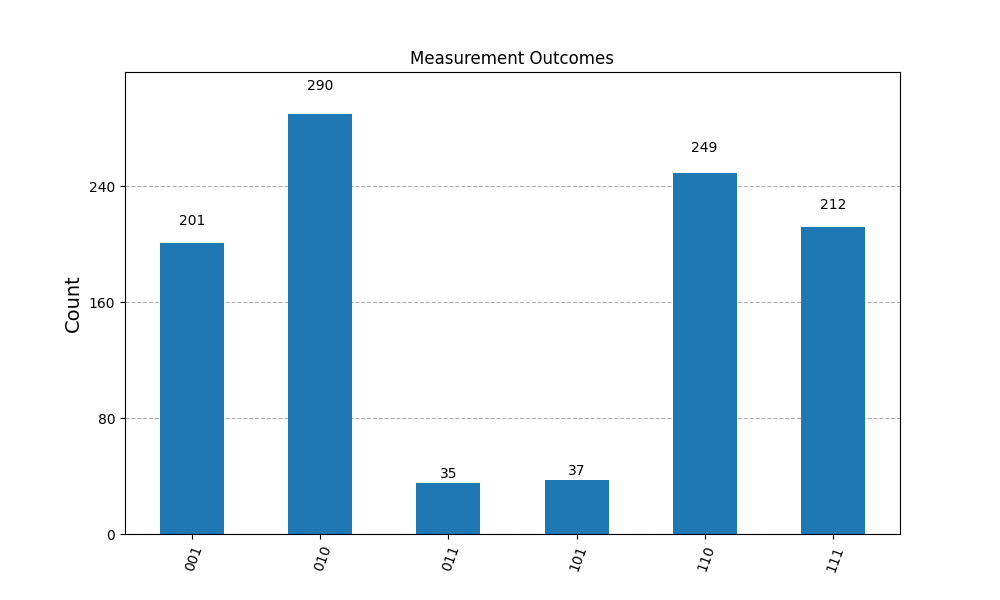

In [45]:
from qiskit.visualization import plot_histogram
from IPython.display import Image, display

# Save the histogram as an image
histogram_path = "histogram.png"
plot_histogram(counts, title="Measurement Outcomes", figsize=(10, 6)).savefig(histogram_path)

# Display the saved image
print("Histogram saved as 'histogram.png'.")
display(Image(filename=histogram_path))


Observations:

- Distinct Measurement Outcomes: We observe six different measurement outcomes: 001, 010, 011, 101, 110, and 111. This suggests that the phase estimation circuit is capable of resolving multiple possible phases.

- Count Distribution: The counts associated with each outcome vary significantly. The outcome "010" has the highest count (290), indicating that it was the most frequently observed result. Other outcomes like "111" and "101" have relatively lower counts (212 and 37, respectively).

Interpretations:

- Phase Estimation Accuracy: The distribution of counts suggests that the phase estimation circuit is likely accurate, as the majority of measurements correspond to the outcome with the highest count. However, the presence of other outcomes with lower counts might indicate some degree of uncertainty or noise in the phase estimation process.

- Phase Value Estimation: The outcome with the highest count (010) might be a good estimate of the actual phase value. However, it's important to consider the other outcomes and their associated counts to assess the overall confidence in the phase estimation.

- Circuit Calibration: The spread of outcomes could also be due to imperfect calibration of the phase estimation circuit. This could lead to some measurements deviating from the true phase value.